<a href="https://colab.research.google.com/github/M-SAAD-BIN-MAZHAR/100DaysOFDeeplearning/blob/main/weightInitialization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Activation, Dropout,LeakyReLU,PReLU

In [6]:
x,y=make_moons(n_samples=1000,noise=0.1,random_state=0)

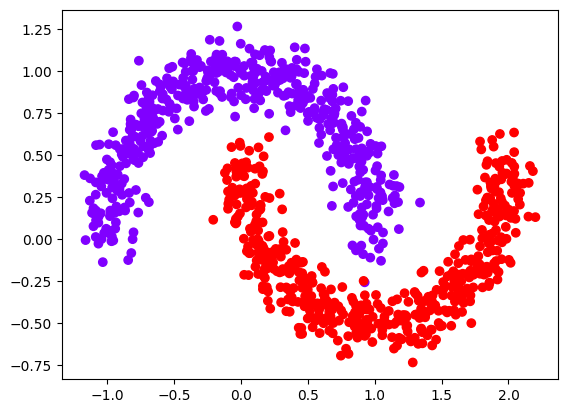

In [7]:
plt.scatter(x[:,0],x[:,1],c=y,cmap='rainbow')

In [9]:
callback=EarlyStopping(monitor='val_loss',
                       min_delta=0.0001,
                       patience=20,
                       verbose=0,
                       restore_best_weights=True,
                       mode='auto'
                       )



In [22]:
model=Sequential()
model.add(Dense(10,input_dim=2,
                kernel_regularizer=tensorflow.keras.regularizers.L1(0.001),kernel_initializer='he_normal'))
model.add(PReLU())
model.add(Dropout(0.3))
model.add(Dense(10 ,
                kernel_regularizer=tensorflow.keras.regularizers.L1(0.001),kernel_initializer='he_normal'))
model.add(PReLU())
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

In [23]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu (PReLU)                 │ (None, 10)             │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_1 (PReLU)               │ (None, 10)             │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 171 (684.00 B)

 Trainable params: 171 (684.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

In [30]:
history=model.fit(x,y,validation_split=0.2,epochs=400,batch_size=32,callbacks=[callback])

Epoch 1/400
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9364 - loss: 0.1980 - val_accuracy: 0.9850 - val_loss: 0.1177
Epoch 2/400
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9410 - loss: 0.1923 - val_accuracy: 0.9800 - val_loss: 0.1194
Epoch 3/400
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9478 - loss: 0.1681 - val_accuracy: 0.9850 - val_loss: 0.1181
Epoch 4/400
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9372 - loss: 0.2065 - val_accuracy: 0.9850 - val_loss: 0.1170
Epoch 5/400
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9614 - loss: 0.1614 - val_accuracy: 0.9850 - val_loss: 0.1184
Epoch 6/400
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9445 - loss: 0.1795 - val_accuracy: 0.9850 - val_loss: 0.1158
Epoch 7/400
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9513 - loss: 0.1810 - val_accuracy: 0.9850 - val_loss: 0.1156
Epoch 8/400
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9398 - loss: 0.1973 - val_accuracy: 0.9850 - 

Text(0.5, 0, 'epoch')

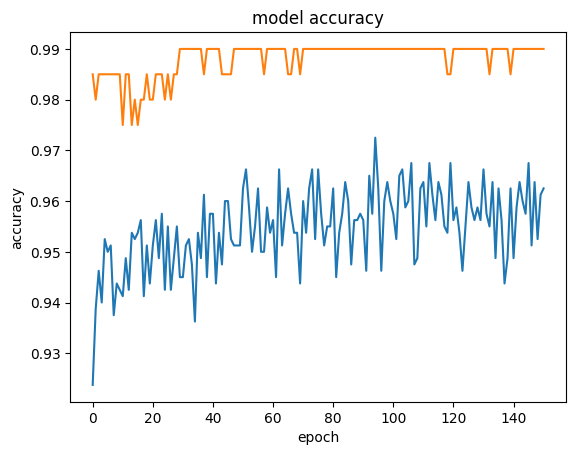

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

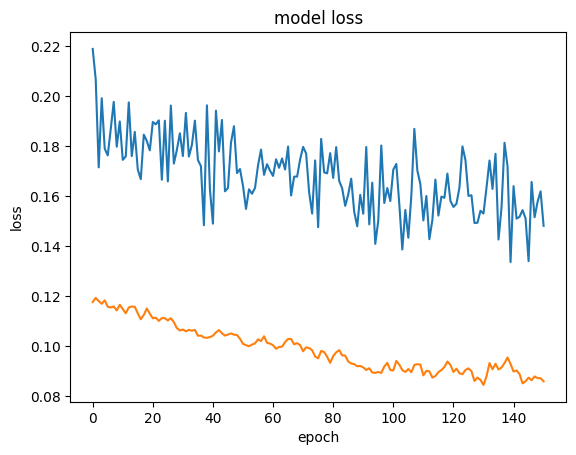

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


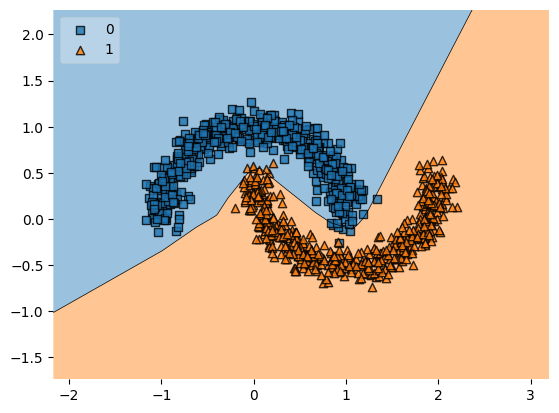

In [33]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x,y,clf=model,legend=2)
plt.show()